In [43]:
# simple exponential smoothing(Level forecasting only)
# double exponential smoothing or Holts method (Level +Trend forecasting only)
# Holts winter method (Level +Trend +Seasonality forecasting )

In [3]:
!pip install statsmodels

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [45]:
df = pd.read_csv('oil_price_exponential_simple&double.csv', header=None, names=['date', 'value'])

In [46]:
df.dtypes

date     object
value     int64
dtype: object

In [47]:
df['date'] = pd.to_datetime(df['date'])

In [49]:
df.head()

,date,value
0,2011-01-01,311037
1,2011-02-01,311189
2,2011-03-01,311351
3,2011-04-01,311522
4,2011-05-01,311699


In [48]:
# Split train and test into 80/20 split
train = df.iloc[:-int(len(df) * 0.2)]
test = df.iloc[-int(len(df) * 0.2):]

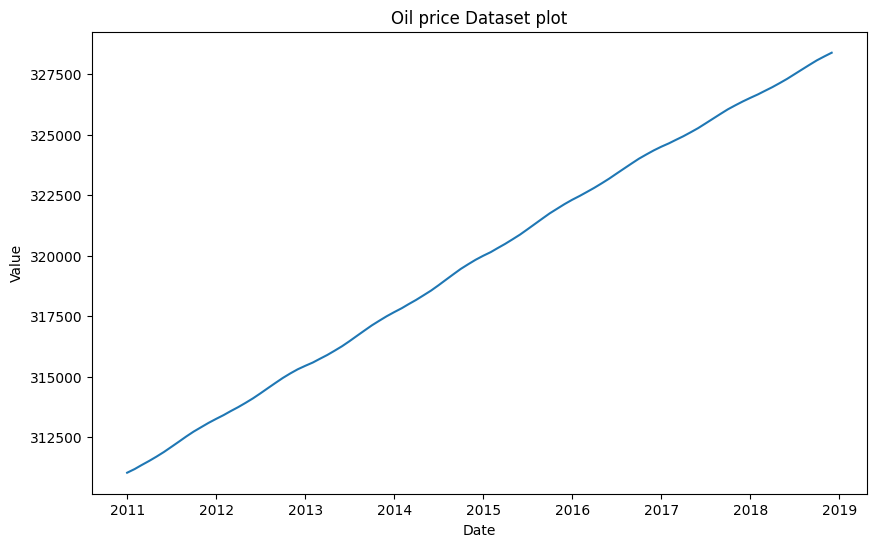

In [50]:
# Ploting the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['value'])

plt.title('Oil price Dataset plot')
plt.xlabel('Date')
plt.ylabel('Value')

plt.show()

## Simple exponential smoothing (Level Forecasting)

In [54]:
def plot_func(forecast: list[float], title: str) -> None:
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['date'], y=train['value'], name='Train'))
    fig.add_trace(go.Scatter(x=test['date'], y=test['value'], name='Test'))
    fig.add_trace(go.Scatter(x=test['date'], y=forecast, name='Forecast'))

    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='date',
                      yaxis_title='value')

    return fig.show()

In [60]:
# Fit model and get forecasts
model = SimpleExpSmoothing(train['value']).fit()
forecasts = model.forecast(len(test))

# Plot the forecasts
plot_func(forecasts, 'Simple Exponential Smoothing')

In [61]:
model.summary()

Dep. Variable:,value,No. Observations:,77
Model:,SimpleExpSmoothing,SSE,2675147.308
Optimized:,True,AIC,809.090
Trend:,None,BIC,813.777
Seasonal:,None,AICC,809.645
Seasonal Periods:,None,Date:,"Thu, 25 Apr 2024"
Box-Cox:,False,Time:,05:24:27
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,3.1104e+05,l.0,False


## Double exponential smoothing (Level + Trend Forecasting)

In [65]:
def plot_func(forecast2: list[float],
              title: str) -> None:
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['date'], y=train['value'], name='Train'))
    fig.add_trace(go.Scatter(x=test['date'], y=test['value'], name='Test'))
    fig.add_trace(go.Scatter(x=test['date'], y=forecast2, name='Holt'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='date',
                      yaxis_title='value')


    return fig.show()


In [79]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

model_double = Holt(train['value'], damped_trend=True).fit()
forecasts_double = model_double.forecast(len(test))

In [80]:
plot_func(forecasts_double, "Double Exponential Smoothing")

In [81]:
model_double.summary()

Dep. Variable:,value,No. Observations:,77
Model:,Holt,SSE,55102.640
Optimized:,True,AIC,516.132
Trend:,Additive,BIC,527.851
Seasonal:,None,AICC,517.756
Seasonal Periods:,None,Date:,"Thu, 25 Apr 2024"
Box-Cox:,False,Time:,08:11:17
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9262842,alpha,True
smoothing_trend,0.9262842,beta,True


## Holts winter method (Level + Trend + Seasonality forecasting)

In [113]:
def plot_func(forecast1: list[float],
              forecast2: list[float],
              title: str) -> None:

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['dates'], y=train['beer_sales'], name='Train'))
    fig.add_trace(go.Scatter(x=test['dates'], y=test['beer_sales'], name='Train'))
    fig.add_trace(go.Scatter(x=test['dates'], y=forecast1, name='Holts Winter Exponential Multiplicative'))
    fig.add_trace(go.Scatter(x=test['dates'], y=forecast2, name="Holts Winter Exponential Additive"))

    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=700, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='beer sales')
    return fig.show()

In [116]:
def plot_func2(forecast1: list[float],
              title: str) -> None:

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['dates'], y=train['beer_sales'], name='Train'))
    fig.add_trace(go.Scatter(x=test['dates'], y=test['beer_sales'], name='Train'))
    fig.add_trace(go.Scatter(x=test['dates'], y=forecast1, name='Holts Winter Exponential'))

    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=700, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='beer sales')
    return fig.show()

In [83]:
df2 = pd.read_csv('beer sales_holts_winter-additive&multiplicative.csv')

In [93]:
missing_values = df2.isnull().sum()
print(missing_values)

dates         36
beer_sales    36
dtype: int64


In [94]:
df_cleaned = df2.dropna()

In [95]:
df_cleaned.dtypes

dates          object
beer_sales    float64
dtype: object

In [97]:
df_cleaned['beer_sales'] = df_cleaned['beer_sales'].astype('int64')
df_cleaned.head()

<ipython-input-97-8138893b86b8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,dates,beer_sales
0,01-01-2005,10919
1,01-02-2005,13314
2,01-03-2005,12729
3,01-04-2005,13435
4,01-05-2005,10452


In [98]:
# Split train and test into 80/20 split
train = df_cleaned.iloc[:-int(len(df_cleaned) * 0.2)]
test = df_cleaned.iloc[-int(len(df_cleaned) * 0.2):]

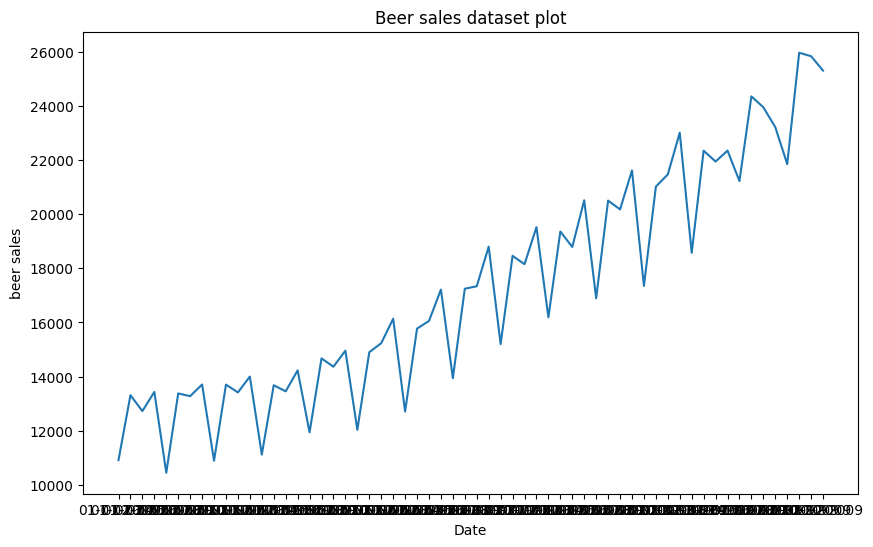

In [99]:
# Ploting the time series data
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned['dates'], df_cleaned['beer_sales'])

plt.title('Beer sales dataset plot')
plt.xlabel('Date')
plt.ylabel('beer sales')

plt.show()

In [112]:
model_holt_winters1 = ExponentialSmoothing(train['beer_sales'], trend='mul',
                                          seasonal='mul', seasonal_periods=12)\
                                          .fit()

model_holt_winters2 = ExponentialSmoothing(train['beer_sales'], trend='add',
                                          seasonal='add', seasonal_periods=12)\
                                          .fit()

forecasts_holt_winters1 = model_holt_winters1.forecast(len(test))
forecasts_holt_winters2 = model_holt_winters2.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning:

overflow encountered in matmul



In [114]:
plot_func(forecasts_holt_winters1, forecasts_holt_winters2,  "Holt-Winters Exponential Smoothing")

In [117]:
#multiplicative
plot_func2(forecasts_holt_winters1, "Holt-Winters Exponential Smoothing")

In [118]:
#additive
plot_func2(forecasts_holt_winters2, "Holt-Winters Exponential Smoothing")

In [119]:
plot_func(forecasts_holt_winters1, forecasts_holt_winters2,  "Holt-Winters Exponential Smoothing")

In [111]:
print(model_holt_winters.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               beer_sales   No. Observations:                   48
Model:             ExponentialSmoothing   SSE                        3591288.050
Optimized:                         True   AIC                            570.695
Trend:                   Multiplicative   BIC                            600.635
Seasonal:                Multiplicative   AICC                           594.282
Seasonal Periods:                    12   Date:                 Thu, 25 Apr 2024
Box-Cox:                          False   Time:                         08:25:34
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.5707143                alpha                 True
smoothing_trend          